In [1]:
from datasets import list_datasets


In [2]:
all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
print(f"처음 10개 데이터셋: {all_datasets[:10]}")

현재 허브에는 22487개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
from datasets import load_dataset
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/bitcamp/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
len(train_ds)

16000

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names


['text', 'label']

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [11]:
print(train_ds["text"][:5])


['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [12]:
#여기부분 드랍박스 파일 날라가서 안됨
# dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
# !wget {dataset_url}

In [13]:
#!head -n 1 train.txt

In [14]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:] # [:] = 표기 안하면 모든 row 또는 columns 선택
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)
            # emotion 데이터 셋 안에 train 이라는 데이터 셋 안에 features인 class label (6가지 감정) 을 지정된 문자열 값으로 반환하는 함수
            # features = 엑셀에서 인덱스 생각(맨왼쪽 맨 위쪽)
            # label = features 의 data
            
df["label_name"] = df["label"].apply(label_int2str)
df.head()



,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


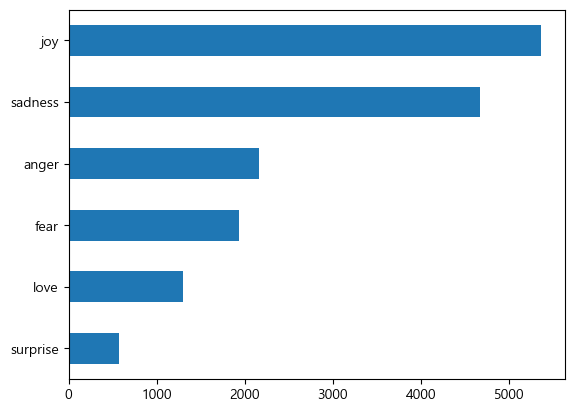

In [16]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh() ## barh형태
plt.show()
# 클래스 내 데이터 불균형 확인 -> 소수 data oversampling 또는 다수 클래스 undersampling
# pip install -U imbalanced-learn , api 사용 나중에


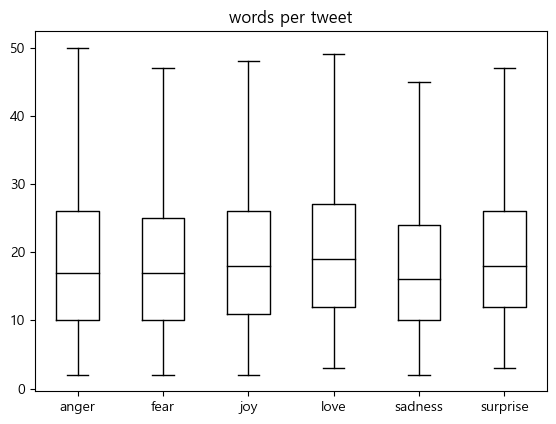

In [17]:
df["words per tweet"] = df["text"].str.split().apply(len)
df.boxplot("words per tweet", by="label_name",grid=False,showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()


In [18]:
# 감정에 대한 단어 길이 15개 단어 정도
# 텍스트가 모델의 문맥 크기보다 긴 경우, 잘린 텍스트에 정보 오차 손실 발생 가능성 존재 -> 현재 data는 괜찮음

# dataframe 출력 포맷 초기화
emotions.reset_format()

In [19]:
# 트랜스포머 모델은 문자열 입력 못받음 (텍스트가 토큰화되어 수치 벡터로 인코딩됨)
# 텍스트 토큰화 -> 1. 문자 토큰화, 2. 단어 토큰화
# 단어를 부분 단위로 나누기 위한 최적 분할은 말뭉치에서 학습됨
# DistilBERT에서 사용하는 토크나이저는?


In [20]:
# 1) 문자 토큰화
# 각 문자별로 토큰화 시킴

text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

#['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [21]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

# 0부터 enumerate 총 개수 18
# key:value for item in iterable} 구조 = 딕셔너리 내포 구조
#  키: 값 for 키, 값 in 딕셔너리

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [22]:
input_ids = [token2idx[token] for token in tokenized_text]
# 리스트 명 = [표현식 for 변수 in 반복 가능한 대상 if 조건문]    = 리스트 내포(list comprehension) 구조
# token을 token2idx[token]으로 변환하는 식임
print(input_ids)

# 리스트 내포(list comprehension) 사용
# 리스트 명 = [표현식 for 변수 in 반복 가능한 대상 if 조건문]


[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [23]:
# 원 핫 예시 코드임


# input_ids -> 원핫 벡터 2d 텐서 변환 (순서형, 명목형 데이터를 인코딩하기 위해 자주 사용됨)
categorical_df=pd.DataFrame(
    {"name": ["bumblebee","optimus prime","Megatron"], "Label id":[0,1,2]}
)
# df 안의 name 컬럼의 3가지 data를 각각 0,1,2 label id로 구분지음
# 별로 안좋음 새 열을 만들어서 2차원으로 하는게 더 좋음
categorical_df




,name,Label id
0,bumblebee,0
1,optimus prime,1
2,Megatron,2


In [24]:
pd.get_dummies(categorical_df["name"])
# 이게 원핫 벡터임
# 0,1로 구분지음


,Megatron,bumblebee,optimus prime
0,0,1,0
1,0,0,1
2,1,0,0


In [25]:
import torch
import torch.nn.functional as F
# nn.functional 모듈은 신경망의 학습과 관련된 다양한 함수를 제공
# ReLU 함수, sigmoid 함수, softmax 함수, cross entropy 함수
# ex) F.relu()

# 파이토치에서의 원핫 방법
# 텐서로 변환 -> one_hot 함수 사용
# one_hot(원핫 할 변수, 출력할 토큰 수=len(원하는text data가 담긴 변수))

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids,num_classes=len(token2idx))
one_hot_encodings.shape


# torch.Size([38, 20])
# 38개 토큰/20차원 (20개의 숫자(=0~19))

torch.Size([38, 20])

In [26]:
print(f"토큰 : {tokenized_text[0]}")
print(f"텐서 인덱스 : {input_ids[0]}")
print(f"원-핫 인코딩 : {one_hot_encodings[0]}")

"""
토큰 : T
텐서 인덱스 : 5
원-핫 인코딩 : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
"""

# 철자 오류, 희귀 단어 search에 유용
# 그러나 너무 작은 단위라서 상당한 양의 계산, 메모리 ,data 필요 -> 결론 : 안씀
# 난 왰,ㅁ?
# 문자 토큰화 -> 텍스트의 일부 구조가 유지되는 토큰화 사용으로 발전 = 단어 토큰화


토큰 : T
텐서 인덱스 : 5
원-핫 인코딩 : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


'\n토큰 : T\n텐서 인덱스 : 5\n원-핫 인코딩 : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])\n'

In [27]:
# 가장 간단한 방법은 공백을 사용하여 텍스트를 토큰화 하는 것.
tokenized_text = text.split() # 공백마다 split 하겠다

print(tokenized_text)

# ['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']
# nlp.이 단어로 잡힘 이 외에도 단어 형태 변화, 철자 오류 등으로 계산량 많음
# 책 피셜 10억개 가중치 가짐

# 그래서 부분단어 토큰화 사용


['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [28]:
# 그래서 부분단어 토큰화 사용
# 자주 등장하지 않는 단어 = 문자 단위로 나눔
# 자주 등장하는 단어 = 단어로 유지
# 말뭉치에서 학습
# BERT, DistilBERT에서 사용되는 토크나이저 wordpiece 사용해보기

from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# AutoTokenizer : 체크포인트 이름을 사용해 모델 설정, 사전 훈련 가중치, 어휘 사전을 로드해주는 클래스 




In [29]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
# 

In [30]:
encoded_text = tokenizer(text)
print(encoded_text)
# 토크나이저 예시
# 어텐션 마스크는 BERT가 어텐션 연산을 할 때, 불필요하게 패딩 토큰에 대해서 어텐션을 하지 않도록 실제 단어와 패딩 토큰을 구분할 수 있도록 알려주는 입력
# = padding 적용시 -> 가장 긴 문장을 기준으로 잡음 -> 나머지 짧은 문장은 긴 문장에 맞춰서 길이 늘림 -> 길이 늘리는 과정에서 0값을 넣음 -> 0 값 = padding 토큰, 1 값 : 실제 입력 토큰 
# 출력 : {'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [31]:
# text -> 토큰 변환
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

# 출력 : ['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']

# 특징
# 1) [CLS] = 처음값 [sep] = 마지막 값
# 2) 토큰값이 모두 소문자로 변환됨
# 3) tokenizing과 NLP가 두개의 토큰으로 나뉨 (자주 사용하지 않는 단어이기 때문)
# 4) ##izing은 # 부분이 공백이 아니란 의미 -> 문자열로 변환시 앞부분과 합침
# 5) 


['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [32]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [33]:
tokenizer.vocab_size

30522

In [34]:
tokenizer.model_max_length

512

In [35]:
tokenizer.model_input_names


# ['input_ids', 'attention_mask']
# 토큰의 인덱스 값, 토큰의 마스크 값( 0인 인덱스는 패딩 토큰, 1인 인덱스는 실제 입력 토큰)
# 단일 문자열 기초 토큰화 과정 완료
# 다음 시간에는 전체 데이터셋 토큰화

['input_ids', 'attention_mask']

In [36]:
# 사전 훈련된 모델 사용시 모델 훈련에 사용한 것과 동일한 토크나이저 사용 필요
# 동일 하지 않은 토크나이저 = 동일하지 않은 어휘사전 사용

2.2.4 전체 데이터 셋 토큰화하기

In [37]:
# 전체 말뭉치 토큰화 -> Datasedict 객체의 map() 메서드 필요
# map 메소드 많이 씀. 새행, 새열을 만드는데도 사용할 수 있음
# 샘플을 토큰화할 처리 함수 필요 -> def로 선언해서 만들어야함

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# padding = True   -> 배치 내 가장 긴 샘플 크기에 맞춰 샘플을 0으로 padding
# truncation = True   -> 모델 최대 문맥 크기에 맞춰 샘플 cut      # truncation 자체 뜻 = 끝 절단


# "tokenize 라는 함수 정의 -> data 변수 batch를 인수로 받음








In [38]:
print(tokenize(emotions["train"][:2])) # "train"의 x값 전체와 y값 2까지? -> 맞넹 -> x값 = 단어 index 값, y값 : 1 문장

# 출력 값 : {'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 
# 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

# 1번째 원소가 더 짧으므로 길이를 동일하게 하기 위해 0 값 넣어줌  그림 2-3 참고시 이해 쉬움

# 0 값 = 현재 쓰고 있는 토크나이저 어휘사전 기준으로 [PAD] 에 해당한다더라
# 특별한 토큰
    # 1) 처음 : [CLS]  / 2) 끝 : [SEP] / 3) 0값 : [PAD] / 4) ?? : [MASK]    ... / 5) ...[UNK]
    


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [39]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
# map() --> 텍스트 -> 토큰화
# (map() 메서드는 말뭉치에 있는 모든 샘플에 개별적으로 작용하므로 batched=True로 설정)
# batched=True batch단위로 처리하겠다.
# batch_size=none   -> 전체 dataset을 배치 한번으로 끝내겠다.
#

Loading cached processed dataset at C:\Users\bitcamp\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-6316da5de5436960.arrow
Loading cached processed dataset at C:\Users\bitcamp\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-2cb11f4abdb48d91.arrow
Loading cached processed dataset at C:\Users\bitcamp\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-1983a40220248de7.arrow


In [40]:
print(emotions_encoded["train"].column_names)

#출력 값 : ['text', 'label', 'input_ids', 'attention_mask']


['text', 'label', 'input_ids', 'attention_mask']


In [41]:
# DistilBERT = 텍스트 시퀀스에 있는 마스킹 된 단어를 예측하도록 사전 훈련 되어 있음
# 이런 모델 바로 사용 못함 -> 수정 필요 -> 왜?
# 먼저 텍스트를 토큰화하는 인코딩(원 핫 벡터) 필요
# 토크나이저의 어휘사전 크기가 토큰 인코딩의 차원을 결정 -> 보통 2만~2백만의 고유 토큰으로 구성
# 토큰 인코딩(원핫)을 저차원 공간의 벡터인 토큰 임베딩으로 변환  (그림 2-4 참고)   -> 이후 인코더 블록 층 통과시켜 각 입력 토큰에 대한 은닉 상태 어쩌구 저쩌구..
# 파이토치는 토큰 인코딩을 위해 원 핫 벡터를 만드는 단계를 건너뜀 (행렬에 원핫 벡터를 곱하면 행렬에서 열 ㅏ나를 선택한 결과가 나오므로 행렬에서 토큰 id에 해당하는 열을 가져오는 식으로 어쩌구 저쩌구...)
# 


# 2.3.1 트랜스포머를 특성 추출기로 사용하기  그림 2-5 참고
# 특성 기반 방식에서는 distilBERT모델을 동결하고 분류 모델을 위한 특성만 제공
# Automodel 사용
 

In [44]:
from transformers import AutoModel # automodel을 import -> DistilBERT의 체크포인트 로드

model_ckpt = "distilbert-base-uncased"     # automodel을 import -> DistilBERT의 체크포인트 로드

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # cuda 되면 cuda라 말하고 아니면 cpu라 응답
model = AutoModel.from_pretrained(model_ckpt).to(device)

# 모델 체크포인트의 일부 가중치가 사용되지 않아서 확인 안됨


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
# TFAutoModel 클래스를 이용하여 tensorflow <-> pytorch 변경 가능

from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt) # ckpt = checkpoint 의 약자임.




c:\Users\bitcamp\.conda\envs\tf274gpu\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bitcamp\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 

In [47]:
tf_xlmr = TFAutoModel.from_pretrained("Xlm-roberta-base", from_pt=True) 
# Xlm-roberta-base = pytorch 가중치만 있는 모델 -> TFAutoModel을 통해 텐서플로우 가중치로 변환
# from_pt=True를 사용하여 TensorFlow에서도 사용할 수 있도록 변환하여 로드할 수 있게 된다고 한다. 
# 애초에 디폴트 값이라 안써도 됨.
# Tensorflow -> pytorch인 경우 from_pt=False로 설정



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
# 문자열에 대한 마지막 은닉상태 추출
# 